# **Credit Card Fraud Detection**

IMPORTING LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib import gridspec

In [2]:
df = pd.read_csv("/content/drive/My Drive/Credit Card Fraud Detection dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

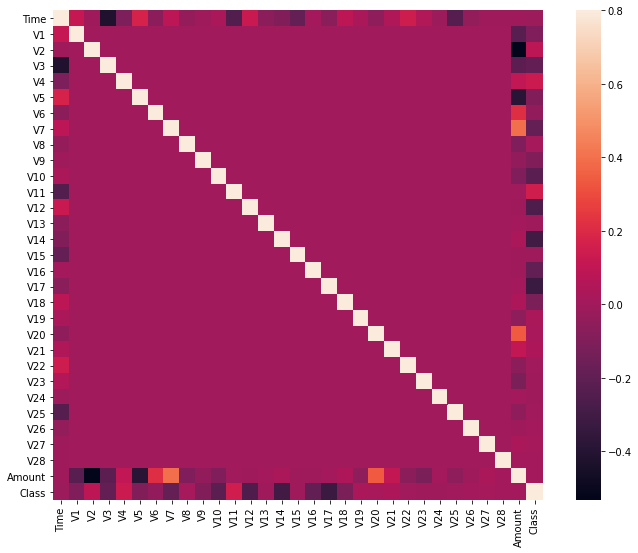

In [5]:
corrmat = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [6]:
fraud = df[df['Class']==1]
valid = df[df['Class']==0]
print('Fraud Transactions: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

Fraud Transactions: 492
Valid Transactions: 284315


In [7]:
X = df.drop(['Class'], axis = 1) 
y = df["Class"]

SPLITTING DATA

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

RANDOM FOREST

In [9]:
#MODEL
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier() 
model.fit(X_train, y_train) 
yPred = model.predict(X_test)

In [10]:
#EVALUATING
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,classification_report,precision_score
print('Accuracy Score:{}'.format(accuracy_score(y_test, yPred)))
print('f1 Score:{}'.format(f1_score(y_test, yPred)))
print('Recall Score:{}'.format(recall_score(y_test,yPred)))
print('Precison Score:{}'.format(precision_score(y_test,yPred)))
print('Classification Report:')
print(classification_report(y_test,yPred))

Accuracy Score:0.9996605924417448
f1 Score:0.8888888888888888
Recall Score:0.8226950354609929
Precison Score:0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.82      0.89       141

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



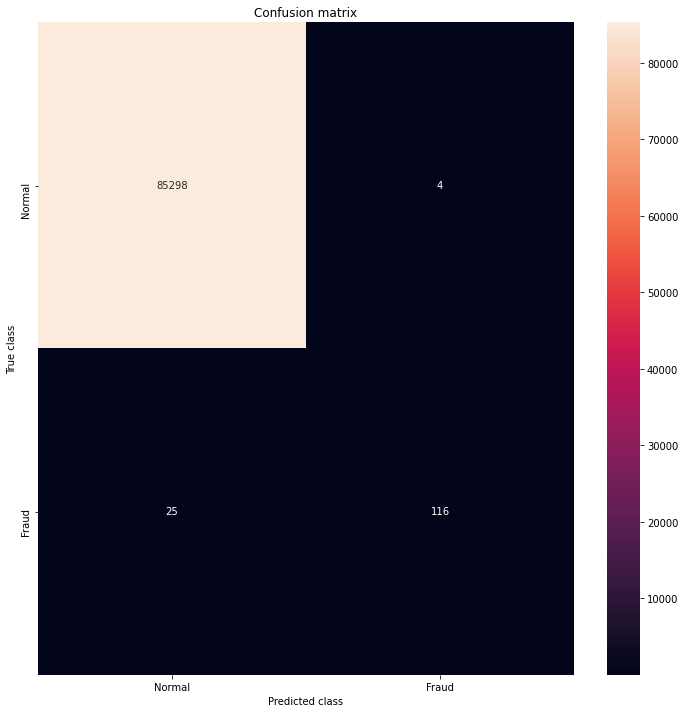

In [11]:
#CONFUSION MATRIX
labels = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

LOGISTIC REGRESSION

In [12]:
#MODEL
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train.values.ravel())
log_pred=log_reg.predict(X_test)

In [13]:
#EVALUATING
print('Accuracy Score:{}'.format(accuracy_score(y_test, log_pred)))
print('f1 Score:{}'.format(f1_score(y_test, log_pred)))
print('Recall Score:{}'.format(recall_score(y_test,log_pred)))
print('Precison Score:{}'.format(precision_score(y_test,log_pred)))
print('Classification Report:')
print(classification_report(y_test,log_pred))

Accuracy Score:0.9991924440855307
f1 Score:0.7206477732793523
Recall Score:0.6312056737588653
Precison Score:0.839622641509434
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.84      0.63      0.72       141

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



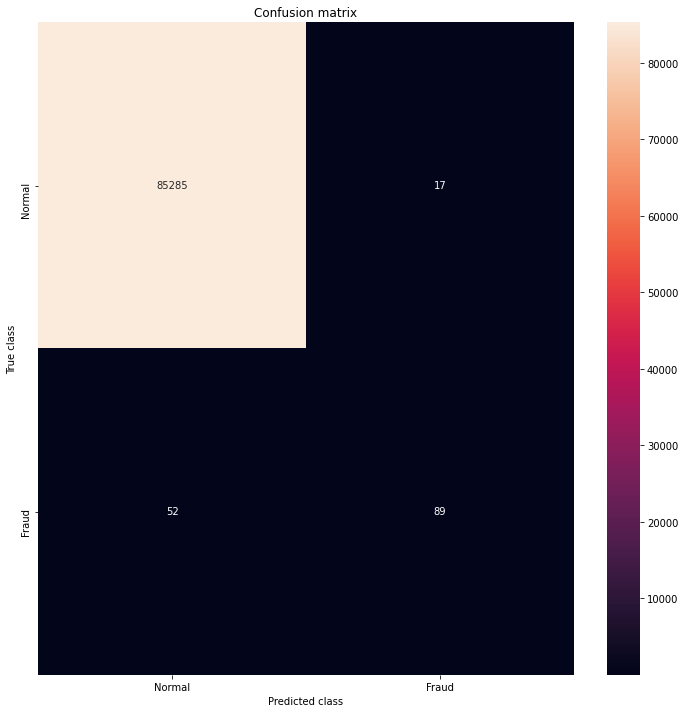

In [14]:
#CONFUSION MATRIX
labels = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, log_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

DECISION TREE

In [15]:
#MODEL
from sklearn.tree import DecisionTreeClassifier
dst=DecisionTreeClassifier()
dst.fit(X_train,y_train)
dst_pred=dst.predict(X_test)

In [16]:
#EVALUATING
print('Accuracy Score:{}'.format(accuracy_score(y_test, dst_pred)))
print('f1 Score:{}'.format(f1_score(y_test, dst_pred)))
print('Recall Score:{}'.format(recall_score(y_test,dst_pred)))
print('Precison Score:{}'.format(precision_score(y_test,dst_pred)))
print('Classification Report:')
print(classification_report(y_test,dst_pred))

Accuracy Score:0.9992626663389628
f1 Score:0.7804878048780488
Recall Score:0.7943262411347518
Precison Score:0.7671232876712328
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.77      0.79      0.78       141

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



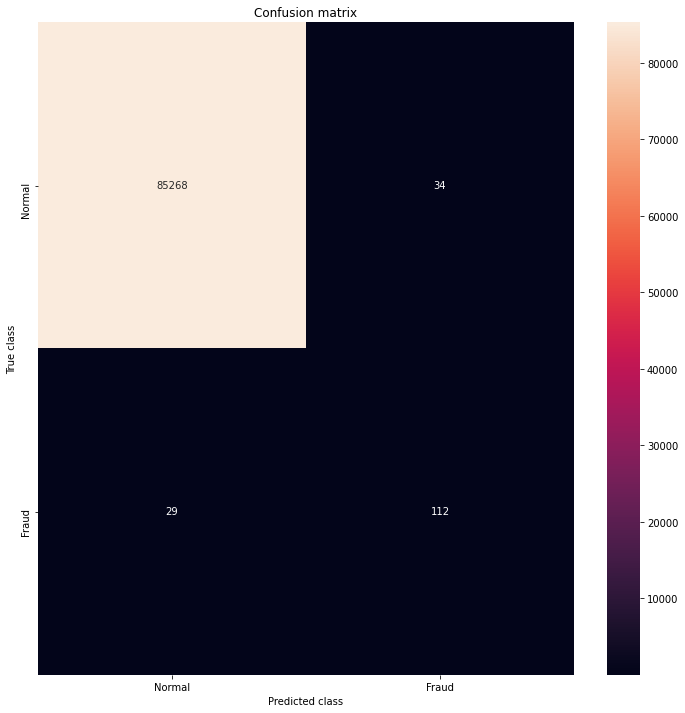

In [17]:
#CONFUSION MATRIX
labels = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, dst_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

SVM

In [22]:
#MODEL
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train.values.ravel())
svm_pred=svm.predict(X_test)

In [28]:
#REMOVE WARNING
import warnings
warnings.filterwarnings('ignore')

In [26]:
#EVALUATING
print('Accuracy Score:{}'.format(accuracy_score(y_test, svm_pred)))
print('f1 Score:{}'.format(f1_score(y_test, svm_pred)))
print('Recall Score:{}'.format(recall_score(y_test,svm_pred)))
print('Precison Score:{}'.format(precision_score(y_test,svm_pred)))
print('Classification Report:')
print(classification_report(y_test,svm_pred))

Accuracy Score:0.9983497770443454
f1 Score:0.0
Recall Score:0.0
Precison Score:0.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.00      0.00      0.00       141

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



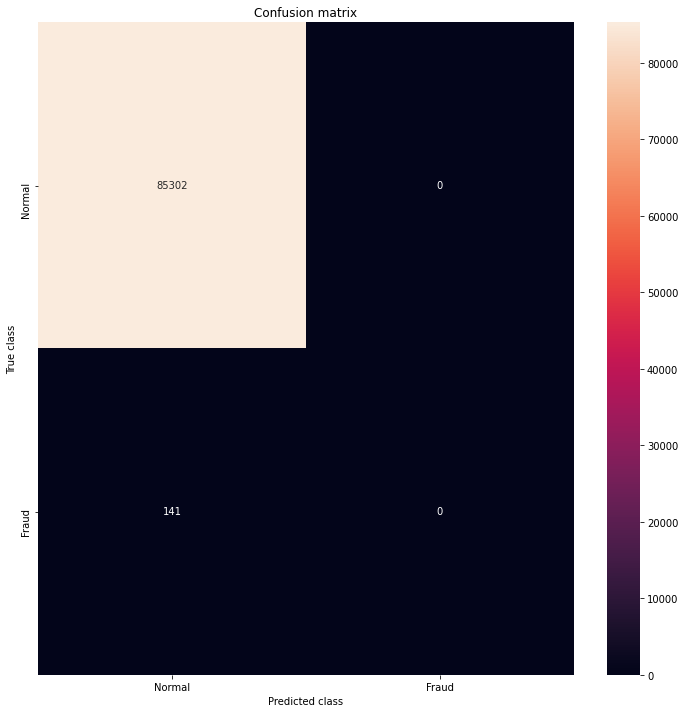

In [27]:
#CONFUSION MATRIX
labels = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, svm_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()